In [4]:
import csv
import pandas as pd
import matplotlib as plt
import  numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv('../data_kaggle/train.csv')
df.head()

,language,sentence,n,edgelist,root
0,Japanese,2,23,"[(6, 4), (2, 6), (2, 23), (20, 2), (15, 20), (...",10
1,Japanese,5,18,"[(8, 9), (14, 8), (4, 14), (5, 4), (1, 2), (6,...",10
2,Japanese,8,33,"[(2, 10), (2, 14), (4, 2), (16, 4), (6, 16), (...",3
3,Japanese,11,30,"[(30, 1), (14, 24), (21, 14), (3, 21), (7, 3),...",30
4,Japanese,12,19,"[(19, 13), (16, 19), (2, 16), (4, 10), (4, 15)...",11


In [6]:
df['language_code'] = df['language'].astype('category').cat.codes
df.head()

,language,sentence,n,edgelist,root,language_code
0,Japanese,2,23,"[(6, 4), (2, 6), (2, 23), (20, 2), (15, 20), (...",10,12
1,Japanese,5,18,"[(8, 9), (14, 8), (4, 14), (5, 4), (1, 2), (6,...",10,12
2,Japanese,8,33,"[(2, 10), (2, 14), (4, 2), (16, 4), (6, 16), (...",3,12
3,Japanese,11,30,"[(30, 1), (14, 24), (21, 14), (3, 21), (7, 3),...",30,12
4,Japanese,12,19,"[(19, 13), (16, 19), (2, 16), (4, 10), (4, 15)...",11,12


In [7]:
def centralities(edgelist):
    """
    - edgelist is a list of node pairs e.g. [(7,2),(1,7),(1,9),...]
    - returns a dictionary of vertex -> (centrality values)
    """
    T = nx.from_edgelist(edgelist)
    dc = nx.degree_centrality(T)
    cc = nx.harmonic_centrality(T)
    bc = nx.betweenness_centrality(T)
    pc = nx.pagerank(T)

    # Additional centralities that might be useful
    ec = nx.eigenvector_centrality(T, max_iter=10000)  # Eigenvector centrality
    kc = nx.katz_centrality(T, max_iter=10000)         # Katz centrality

    return {v: (dc[v], cc[v], bc[v], pc[v], ec[v], kc[v]) for v in T}


In [8]:
import ast
import networkx as nx
all_features = []
all_targets = []
all_sentence_ids = []
for i, row in df.iterrows():
    sentence_id = row['sentence']
    language = row['language']
    language_code = row['language_code']
    n = row['n']

    if isinstance(row['edgelist'], str):
        edgelist = ast.literal_eval(row['edgelist'])
    else:
        edgelist = row['edgelist']

    # Parse root from string if needed
    if isinstance(row['root'], str):
        import ast
        root = ast.literal_eval(row['root'])
    else:
        root = row['root']

    T = nx.from_edgelist(edgelist)
    cent = centralities(edgelist)
    for v in T.nodes():
        is_root = 1 if v == root else 0
        dc, cc, bc, pc, ec, kc = cent[v]

        features = [language,language_code, sentence_id, n, v, dc, cc, bc, pc, ec, kc ]
        all_features.append(features)
        all_targets.append(is_root)
        all_sentence_ids.append(sentence_id)

feature_columns=['language','language_code', 'sentence_id','n', 'vertex', 'degree_cent', 'closeness_cent', 'betweenness_cent', 'pagerank_cent',
        'eigenvector_cent', 'katz_cent']
# Create DataFrame
X = pd.DataFrame(all_features, columns=feature_columns)
y = pd.Series(all_targets, name='is_root')
sentence_ids = pd.Series(all_sentence_ids, name='sentence_id')



In [9]:
X

,language,language_code,sentence_id,n,vertex,degree_cent,closeness_cent,betweenness_cent,pagerank_cent,eigenvector_cent,katz_cent
0,Japanese,12,2,23,6,0.090909,5.823846,0.090909,0.048565,0.149471,0.209086
1,Japanese,12,2,23,4,0.045455,4.561122,0.000000,0.027162,0.068501,0.188298
2,Japanese,12,2,23,2,0.136364,6.991703,0.255411,0.066901,0.257652,0.228660
3,Japanese,12,2,23,23,0.045455,5.157179,0.000000,0.025477,0.118078,0.190256
4,Japanese,12,2,23,20,0.090909,7.146825,0.311688,0.042552,0.294656,0.213357
...,...,...,...,...,...,...,...,...,...,...,...
197474,Russian,16,995,19,19,0.055556,5.005159,0.000000,0.032147,0.108220,0.205491
197475,Russian,16,995,19,1,0.055556,6.034524,0.000000,0.029739,0.226818,0.211939
197476,Russian,16,995,19,14,0.055556,6.034524,0.000000,0.029739,0.226818,0.211939
197477,Russian,16,995,19,5,0.111111,6.701190,0.111111,0.057065,0.270168,0.232488


In [11]:
combined_df = pd.concat([X, y], axis=1)
combined_df.to_csv('../data_preprocess/networkx0_full.csv', index=False, header=True)
combined_df


,language,language_code,sentence_id,n,vertex,degree_cent,closeness_cent,betweenness_cent,pagerank_cent,eigenvector_cent,katz_cent,is_root
0,Japanese,12,2,23,6,0.090909,5.823846,0.090909,0.048565,0.149471,0.209086,0
1,Japanese,12,2,23,4,0.045455,4.561122,0.000000,0.027162,0.068501,0.188298,0
2,Japanese,12,2,23,2,0.136364,6.991703,0.255411,0.066901,0.257652,0.228660,0
3,Japanese,12,2,23,23,0.045455,5.157179,0.000000,0.025477,0.118078,0.190256,0
4,Japanese,12,2,23,20,0.090909,7.146825,0.311688,0.042552,0.294656,0.213357,0
...,...,...,...,...,...,...,...,...,...,...,...,...
197474,Russian,16,995,19,19,0.055556,5.005159,0.000000,0.032147,0.108220,0.205491,0
197475,Russian,16,995,19,1,0.055556,6.034524,0.000000,0.029739,0.226818,0.211939,0
197476,Russian,16,995,19,14,0.055556,6.034524,0.000000,0.029739,0.226818,0.211939,0
197477,Russian,16,995,19,5,0.111111,6.701190,0.111111,0.057065,0.270168,0.232488,0


In [12]:

centrality_features = ['degree_cent', 'closeness_cent', 'betweenness_cent',
                       'pagerank_cent', 'eigenvector_cent', 'katz_cent']
# corr_matrix = combined_df[centrality_features].corr()
#
# plt.figure(figsize=(12, 10))
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)
# plt.title('Feature Correlation Matrix')
# plt.tight_layout()
# plt.show()

In [13]:
df_lang=combined_df[combined_df['language_code']==17]
df_lang.to_csv('../data_preprocess/spanish_networkx.csv', index=False, header=True)
df_lang[:25]


,language,language_code,sentence_id,n,vertex,degree_cent,closeness_cent,betweenness_cent,pagerank_cent,eigenvector_cent,katz_cent,is_root
89868,Spanish,17,2,17,3,0.187500,6.634524,0.341667,0.090343,0.256511,0.267647,0
89869,Spanish,17,2,17,14,0.187500,7.159524,0.566667,0.086008,0.327129,0.270111,0
89870,Spanish,17,2,17,13,0.125000,5.717857,0.125000,0.063707,0.179381,0.243115,0
89871,Spanish,17,2,17,10,0.062500,4.348016,0.000000,0.035899,0.079192,0.218559,0
89872,Spanish,17,2,17,6,0.125000,6.700000,0.525000,0.057677,0.305101,0.247868,0
89873,Spanish,17,2,17,16,0.187500,7.066667,0.591667,0.086414,0.363969,0.266092,0
89874,Spanish,17,2,17,2,0.062500,5.050000,0.000000,0.033308,0.160682,0.220857,0
89875,Spanish,17,2,17,7,0.125000,6.683333,0.500000,0.058276,0.358663,0.249713,0
89876,Spanish,17,2,17,17,0.250000,7.292857,0.516667,0.117494,0.448461,0.288558,0
89877,Spanish,17,2,17,8,0.062500,5.003571,0.000000,0.033791,0.197981,0.223104,0


/tmp/ipykernel_6967/1656954670.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_df['is_root'], palette='viridis')


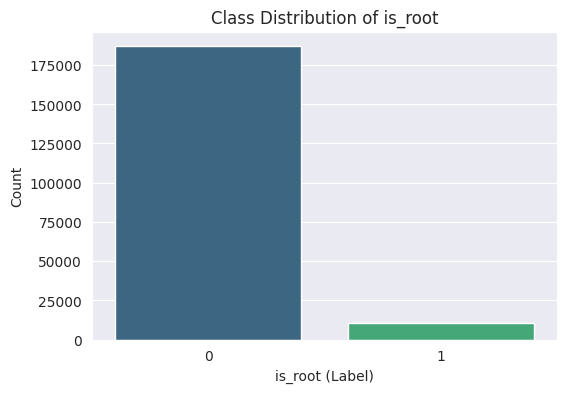

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(6,4))
sns.countplot(x=combined_df['is_root'], palette='viridis')
plt.title("Class Distribution of is_root")
plt.xlabel("is_root (Label)")
plt.ylabel("Count")
plt.show()